# LSTM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
directory = "/content/drive/My Drive/2023_DACON_seoultemp/"
train_dir = directory + "train.csv"
sample_dir = directory + "sample_submission.csv"

In [3]:
# import libraries
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
# read the csv file
train_data = pd.read_csv(train_dir)

In [6]:
train_data.describe()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
count,23008.000000,23008.000000,23007.000000,9150.000000,23011.000000,23007.000000,22893.000000,18149.000000,22645.000000,23011.000000
mean,17.071714,8.451960,8.619277,9.593683,65.202851,2.380993,5.858826,11.933170,48.653526,12.415419
std,10.714471,10.578285,2.907096,21.966135,14.549077,0.947595,3.816941,6.419122,31.662321,10.489515
min,-13.600000,-20.200000,1.000000,0.000000,17.900000,0.100000,0.000000,0.000000,0.000000,-16.400000
25%,7.800000,-0.300000,6.600000,0.100000,54.900000,1.700000,2.200000,7.000000,17.800000,3.400000
50%,18.900000,9.200000,8.600000,1.400000,65.500000,2.200000,6.600000,11.220000,55.700000,13.800000
75%,26.400000,17.900000,10.600000,8.500000,75.800000,2.900000,9.000000,16.620000,78.000000,21.800000
max,39.600000,30.300000,19.600000,332.800000,99.800000,7.800000,13.700000,33.480000,96.900000,33.700000


In [7]:
train_data.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6


In [8]:
# read the csv file
train_MICE_dir = directory + "train_MICE.csv"
train_MICE_data = pd.read_csv(train_MICE_dir)

In [9]:
train_MICE_data.describe()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,번호
count,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000
mean,17.071712,8.452436,8.619276,2.274607,65.202851,2.380941,5.830290,11.702284,48.626203,12.415419,11505.000000
std,10.713773,10.577859,2.906843,16.978513,14.549077,0.947532,3.828077,6.324824,31.670501,10.489515,6642.847858
min,-13.600000,-20.200000,1.000000,-38.476127,17.900000,0.100000,-1.064058,-11.845202,-11.191858,-16.400000,0.000000
25%,7.800000,-0.300000,6.600000,-4.768298,54.900000,1.700000,2.100000,6.750000,17.750000,3.400000,5752.500000
50%,18.900000,9.200000,8.600000,0.300000,65.500000,2.200000,6.600000,10.950000,55.700000,13.800000,11505.000000
75%,26.400000,17.900000,10.600000,5.707451,75.800000,2.900000,9.000000,16.320000,78.000000,21.800000,17257.500000
max,39.600000,30.300000,19.600000,332.800000,99.800000,7.800000,13.700000,33.480000,97.095388,33.700000,23010.000000


In [10]:
train_MICE_data.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,번호
0,1960-01-01,2.2,-5.2,7.4,-2.03231,68.3,1.7,6.7,7.744078,63.984508,-1.6,0.0
1,1960-01-02,1.2,-5.6,6.8,0.40000,87.7,1.3,0.0,0.028984,7.741168,-1.9,1.0
2,1960-01-03,8.7,-2.1,10.8,0.00000,81.3,3.0,0.0,3.489132,0.650103,4.0,2.0
3,1960-01-04,10.8,1.2,9.6,0.00000,79.7,4.4,2.6,7.396766,18.722855,7.5,3.0
4,1960-01-05,1.3,-8.2,9.5,-15.02112,44.0,5.1,8.2,12.838274,74.289900,-4.6,4.0


In [11]:
train_MICE_data.columns

Index(['일시', '최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율',
       '평균기온', '번호'],
      dtype='object')

In [12]:
# save original 'Open' prices for later
original_avg = train_MICE_data['평균기온'].values

# separate dates for future plotting
dates = pd.to_datetime(train_MICE_data['일시'])

In [13]:
dates.head()

0   1960-01-01
1   1960-01-02
2   1960-01-03
3   1960-01-04
4   1960-01-05
Name: 일시, dtype: datetime64[ns]

In [14]:
# variables for training
cols = ['최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속',
        '일조합', '일사합', '일조율', '평균기온'] # 번호 제거함

# new dataframe with only training data - 10 columns
train_cols_data = train_MICE_data[cols].astype(float)

In [15]:
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(train_cols_data)
train_cols_scaled = scaler.transform(train_cols_data)

In [16]:
# split to train data and test data
n_train = int(0.9*train_cols_scaled.shape[0])
train_data_scaled = train_cols_scaled[0: n_train]
train_dates = dates[0: n_train]

test_data_scaled = train_cols_scaled[n_train:]
test_dates = dates[n_train:]

In [17]:
train_data_scaled[0]

array([-1.38812305, -1.29068963, -0.41945927, -0.25367421,  0.21288062,
       -0.71866241,  0.22719737, -0.62583442,  0.48495094, -1.33616501])

In [18]:
print(test_dates.head(5))

20709   2016-09-12
20710   2016-09-13
20711   2016-09-14
20712   2016-09-15
20713   2016-09-16
Name: 일시, dtype: datetime64[ns]


In [51]:
# data reformatting for LSTM
pred_days = 366  # prediction period
seq_len = 1000   # sequence length = past days for future prediction.
input_dim = 10  # input_dimension = number of input columns

trainX = []
trainY = []
testX = []
testY = []

for i in range(seq_len, n_train-pred_days +1):
    trainX.append(train_data_scaled[i - seq_len:i, 0:train_data_scaled.shape[1]])
    trainY.append(train_data_scaled[i + pred_days - 1:i + pred_days, -1])

for i in range(seq_len, len(test_data_scaled)-pred_days +1):
    testX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
    testY.append(test_data_scaled[i + pred_days - 1:i + pred_days, -1])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

In [52]:
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(19344, 1000, 10) (19344, 1)
(937, 1000, 10) (937, 1)


In [53]:
# LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), # (seq length, input dimension)
               return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1000, 64)          19200     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 31649 (123.63 KB)
Trainable params: 31649 (123.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf

# Specify initial learning rate
initial_learning_rate = 0.001

# Define the decay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,      # Initial learning rate
    decay_steps=1000,           # Decay step
    decay_rate=0.96,            # Decay rate
    staircase=True              # Whether to apply decay in a discrete staircase fashion
)

# Create an Adam optimizer with the specified learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile your model using the custom optimizer
model.compile(optimizer=optimizer, loss='mse')

No weights found, training model from scratch
Epoch 1/10
545/545 [==============================] - 38s 62ms/step - loss: 0.1154 - val_loss: 0.1249
Epoch 2/10
545/545 [==============================] - 33s 61ms/step - loss: 0.1032 - val_loss: 0.0982
Epoch 3/10
545/545 [==============================] - 33s 61ms/step - loss: 0.1003 - val_loss: 0.1012
Epoch 4/10
545/545 [==============================] - 35s 63ms/step - loss: 0.0976 - val_loss: 0.0997
Epoch 5/10
545/545 [==============================] - 39s 71ms/step - loss: 0.0949 - val_loss: 0.0992
Epoch 6/10
545/545 [==============================] - 39s 71ms/step - loss: 0.0930 - val_loss: 0.0994
Epoch 7/10
545/545 [==============================] - 41s 75ms/step - loss: 0.0903 - val_loss: 0.1046
Epoch 8/10
545/545 [==============================] - 33s 61ms/step - loss: 0.0878 - val_loss: 0.1038
Epoch 9/10
545/545 [==============================] - 32s 59ms/step - loss: 0.0844 - val_loss: 0.1396
Epoch 10/10
545/545 [===============

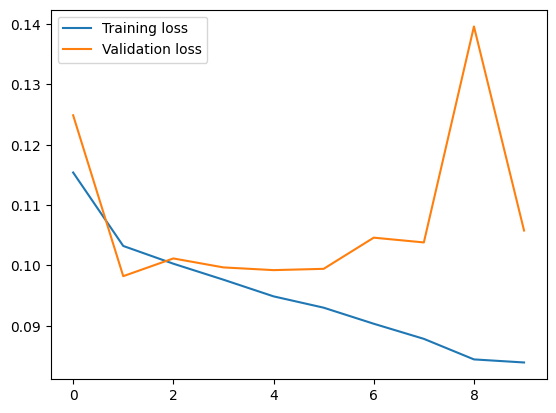

In [56]:
# Try to load weights
try:
    model.load_weights(directory + 'save_weights/lstm_weights_1715.h5')
    print("Loaded model weights from disk")
except:
    print("No weights found, training model from scratch")
    # Fit the model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32,
                    validation_split=0.1, verbose=1)
    # Save model weights after training
    model.save_weights(directory + 'save_weights/lstm_weights_1715.h5')

    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()

In [57]:
# prediction
prediction = model.predict(testX)
print(prediction.shape, testY.shape)

30/30 [==============================] - 1s 27ms/step
(937, 1) (937, 1)


In [58]:
## inverse transforming the normalization of y_pred

# generate array filled with means for prediction
mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], prediction.shape[0], axis=0)

# substitute predictions into the first column
mean_values_pred[:, -1] = np.squeeze(prediction)

# inverse transform
y_pred = scaler.inverse_transform(mean_values_pred)[:,-1]
print(y_pred.shape)

(937,)


In [59]:
## inverse transforming the normalization of testY

# generate array filled with means for testY
mean_values_testY = np.repeat(scaler.mean_[np.newaxis, :], testY.shape[0], axis=0)

# substitute testY into the first column
mean_values_testY[:, -1] = np.squeeze(testY)

# inverse transform
testY_original = scaler.inverse_transform(mean_values_testY)[:,-1]
print(testY_original.shape)

(937,)


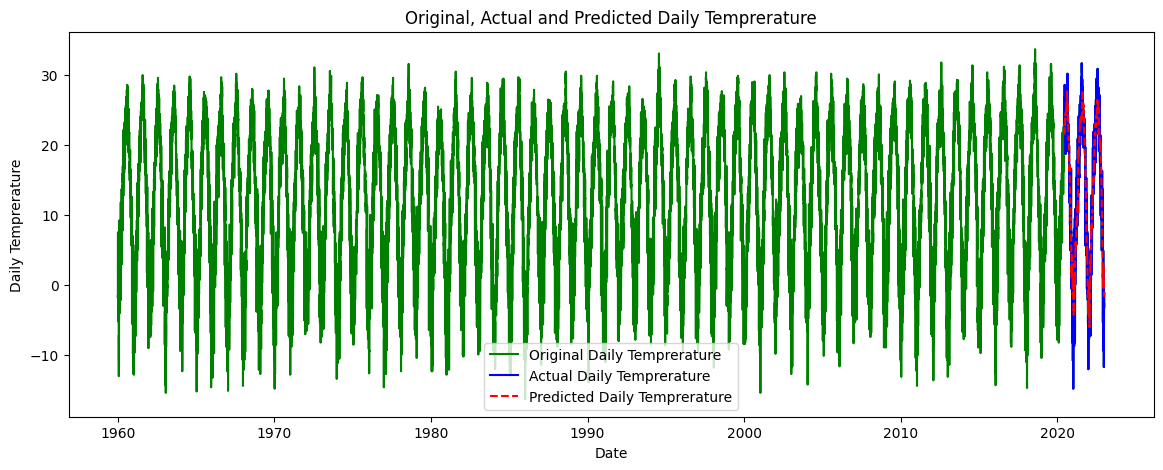

In [65]:
# plotting
plt.figure(figsize=(14, 5))

# plot original 'Open' prices
plt.plot(dates, original_avg, color='green', label='Original Daily Temprerature')

# plot actual vs predicted
plt.plot(test_dates[seq_len+pred_days-1:], testY_original, color='blue', label='Actual Daily Temprerature')
plt.plot(test_dates[seq_len+pred_days-1:], y_pred, color='red', linestyle='--', label='Predicted Daily Temprerature')
plt.xlabel('Date')
plt.ylabel('Daily Temprerature')
plt.title('Original, Actual and Predicted Daily Temprerature')
plt.legend()
plt.show()

886


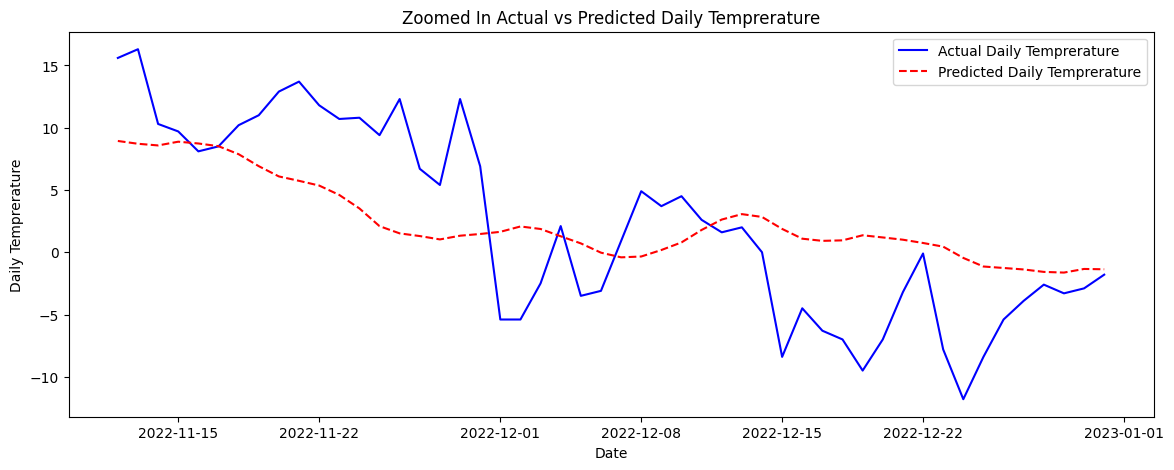

In [70]:
# Calculate the start and end indices for the zoomed plot
zoom_start = len(test_dates) - 50
zoom_end = len(test_dates)

# Create the zoomed plot
plt.figure(figsize=(14, 5))

# Adjust the start index for the testY_original and y_pred arrays
adjusted_start = zoom_start - seq_len - pred_days

plt.plot(test_dates[zoom_start:zoom_end],
         testY_original[adjusted_start:zoom_end - zoom_start + adjusted_start],
         color='blue',
         label='Actual Daily Temprerature')

plt.plot(test_dates[zoom_start:zoom_end],
         y_pred[adjusted_start:zoom_end - zoom_start + adjusted_start ],
         color='red',
         linestyle='--',
         label='Predicted Daily Temprerature')

plt.xlabel('Date')
plt.ylabel('Daily Temprerature')
plt.title('Zoomed In Actual vs Predicted Daily Temprerature')
plt.legend()
plt.show()

# Prediction

In [73]:
# separate dates for future plotting
dates = pd.to_datetime(train_MICE_data['일시'])

In [75]:
# data reformatting for LSTM
pred_days = pred_days  # prediction period 366
seq_len = seq_len   # sequence length = past days for future prediction. 1000
input_dim = input_dim  # input_dimension = number of input columns. 10

max_index = train_cols_scaled.shape[0]
realX = []

for i in range(max_index - pred_days + 1,max_index + 365 - pred_days + 1):
    realX.append(train_cols_scaled[i - seq_len:i, 0:input_dim])

realX = np.array(realX)

In [76]:
# prediction
prediction = model.predict(realX)
print(prediction.shape)

12/12 [==============================] - 0s 39ms/step
(365, 1)


In [77]:
## inverse transforming the normalization of y_pred

# generate array filled with means for prediction
mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], prediction.shape[0], axis=0)

# substitute predictions into the first column
mean_values_pred[:, -1] = np.squeeze(prediction)

# inverse transform
y_pred = scaler.inverse_transform(mean_values_pred)[:,-1]
print(y_pred.shape)

(365,)


In [86]:
df_submission = pd.read_csv(sample_dir)
print(df_submission.shape)

(358, 2)


In [87]:
df_submission = pd.read_csv(sample_dir)
df_submission.iloc[:, 1] = y_pred[:df_submission.shape[0]]
df_submission.to_csv(directory + "submission_20231227_1758.csv", index=False)